# Channel flow in 2D (incompressible fluid)

For channel flow in 2D, we only need to make two minor changes to our previous 2D code: (1) modify the boundary conditions, and (2) restore the driving force term in the Navier-Stokes equations.

We will take the channel to be rectangular, with walls at $y=0$ and $y=L_{y}$, open ends at $x=0$ and $x=L_{x}$. As before, we are restricting the flow to 2D, and we are going to neglect gravity.

The initial and boundary conditions that we will use to model this situation are the following. As before, initially all fields are set to zero

\begin{align}
  & u(x,y,0) = 0 \\
  & v(x,y,0) = 0 \\
  & p(x,y,0) = 0.
\end{align}

The boundary conditions need to reflect that fact that there is no fluid flow or forces at the walls of the channel. At the open ends, we will choose periodic boundary conditions for all fields. For pressure we have

\begin{align}
  & p(0,y,t) = p(L_{x},y,t) \\
  & \frac{\partial p}{\partial x}(x,L_{y},t) = 0 \\
  & \frac{\partial p}{\partial x}(x,0,t) = 0.
\end{align}

The boundary conditions for the velocity field are

\begin{align}
  & u(0,y,t) = u(L_{x},y,t) \\
  & v(0,y,t) = v(L_{x},y,t) \\
  & u(x,0,t) = v(x,0,t) = 0 \\
  & u(x,L_{y},t) = v(x,L_{y},t) = 0.
\end{align}

Restoring the external driving force to the Navier-Stokes equation yields

\begin{align}
  \frac{\partial \vec{u}}{\partial t} + \left(\vec{u}\cdot\nabla\right)\vec{u}
  = -\frac{1}{\rho}\nabla{p} + \nu\nabla^2\vec{u} + \vec{f}_\mathrm{ext}.
\end{align}

We will take the driving force to be constant and uniform, directed parallel to the channel

\begin{align}
  & f_{x}(x,y,t) = 1 \\
  & f_{y}(x,y,t) = 0.
\end{align}

## Discretization and evolution scheme

As before, the Navier-Stokes (momentum) equations are discretized as follows

\begin{align}
  & u^{n+1}_{i,j} = u^{n}_{i,j} 
  - \frac{\Delta{t}}{\Delta{x}}u^{n}_{i,j}\left(u^{n}_{i,j} - u^{n}_{i-1,j}\right)
  - \frac{\Delta{t}}{\Delta{y}}v^{n}_{i,j}\left(u^{n}_{i,j} - u^{n}_{i,j-1}\right)
  - \frac{\Delta{t}}{2\rho\Delta{x}}\left(p^{n}_{i+1,j} - p^{n}_{i-1,j}\right)
  \\ & \quad\quad\quad
  + \frac{\nu\Delta{t}}{(\Delta{x})^2}\left(u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}\right)
  + \frac{\nu\Delta{t}}{(\Delta{y})^2}\left(u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}\right)
  + \Delta{t}f_{i,j}
\end{align}

\begin{align}
  & v^{n+1}_{i,j} = v^{n}_{i,j} 
  - \frac{\Delta{t}}{\Delta{x}}u^{n}_{i,j}\left(v^{n}_{i,j} - v^{n}_{i-1,j}\right)
  - \frac{\Delta{t}}{\Delta{y}}v^{n}_{i,j}\left(v^{n}_{i,j} - v^{n}_{i,j-1}\right)
  - \frac{\Delta{t}}{2\rho\Delta{y}}\left(p^{n}_{i+1,j} - p^{n}_{i,j-1}\right)
  \\ & \quad\quad\quad
  + \frac{\nu\Delta{t}}{(\Delta{x})^2}\left(v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j}\right)
  + \frac{\nu\Delta{t}}{(\Delta{y})^2}\left(v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1}\right).
\end{align}

The pressure constraint is also the same as before

\begin{align}
  p^{[r+1]}_{i,j} =
  \frac{(\Delta{y})^2\left(p^{[r]}_{i+1,j} + p^{[r]}_{i-1,j}\right)
  + (\Delta{x})^2\left(p^{[r]}_{i,j+1} + p^{[r]}_{i,j-1}\right)
  - (\Delta{x})^2(\Delta{y})^2 s_{i,j}}{2\left((\Delta{x})^2 + (\Delta{y})^2\right)},
\end{align}

with

\begin{align}
  s_{i,j} = 
  &\rho\left[
  \frac{1}{2\Delta{t}\Delta{x}}(u^{n}_{i+1,j} - u^{n}_{i-1,j})
  +\frac{1}{2\Delta{t}\Delta{y}}(v^{n}_{i,j+1} - v^{n}_{i,j-1})\right.
  \\
  &\quad
  -\frac{1}{4(\Delta{x})^2}(u^{n}_{i+1,j} - u^{n}_{i-1,j})^2
  - \frac{1}{2\Delta{x}\Delta{y}}(u^{n}_{i,j+1} - u^{n}_{i,j-1})(v^{n}_{i+1,j} - v^{n}_{i-1,j})
  - \frac{1}{4(\Delta{y})^2}(v^{n}_{i,j+1} - v^{n}_{i,j-1})^2
  \\
  &\quad
  - \frac{1}{(\Delta{x})^2}u^{n}_{i,j}\left(u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}\right)
  - \frac{1}{4\Delta{x}\Delta{y}}u^{n}_{i,j}
    \left(u^{n}_{i+1,j+1} - u^{n}_{i+1,j-1} - u^{n}_{i-1,j+1} + u^{n}_{i-1,j-1}\right)
  \\
  &\quad\left.
  - \frac{1}{4\Delta{x}\Delta{y}}v^{n}_{i,j}
    \left(v^{n}_{i+1,j+1} - v^{n}_{i+1,j-1} - v^{n}_{i-1,j+1} + v^{n}_{i-1,j-1}\right)
  - \frac{1}{(\Delta{y})^2}v^{n}_{i,j}\left(v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1}\right)
  \right].
\end{align}

The resulting code is nearly identical to the code we used for 2D cavity flow.

In [1]:
import numpy as np
import time
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [2]:
# calculate rhs for pressure constraint
def poisson_rhs(un, vn, dx, dy, dt, rho):

    # print message (debugging)
    #print('re-calculating rhs for pressure equation...')

    # initialize arrays
    dudx = np.zeros_like(un)
    dvdx = np.zeros_like(vn)
    dudy = np.zeros_like(un)
    dvdy = np.zeros_like(vn)
    ududxx = np.zeros_like(un)
    vdudxy = np.zeros_like(vn)
    udvdyx = np.zeros_like(un)
    vdvdyy = np.zeros_like(vn)

    # interior points
    dudx[1:-1, 1:-1] = (un[2:, 1:-1] - un[0:-2, 1:-1])/(2*dx) #centered x difference
    dvdx[1:-1, 1:-1] = (vn[2:, 1:-1] - vn[0:-2, 1:-1])/(2*dx) #centered x difference
    dudy[1:-1, 1:-1] = (un[1:-1, 2:] - un[1:-1, 0:-2])/(2*dy) #centered y difference
    dvdy[1:-1, 1:-1] = (vn[1:-1, 2:] - vn[1:-1, 0:-2])/(2*dy) #centered y difference

    ududxx[1:-1,1:-1] = un[1:-1,1:-1]*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1])/(dx*dx) #centered x difference
    vdvdyy[1:-1,1:-1] = vn[1:-1,1:-1]*(vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1])/(dy*dy) #centered x difference
    vdudxy[1:-1,1:-1] = vn[1:-1,1:-1]*(un[2:,2:] - un[2:,0:-2] - un[0:-2,2:] + un[0:-2,0:-2])/(4*dx*dy) #centered differences
    udvdyx[1:-1,1:-1] = un[1:-1,1:-1]*(vn[2:,2:] - vn[2:,0:-2] - vn[0:-2,2:] + vn[0:-2,0:-2])/(4*dx*dy) #centered differences

#    # boundary edge x=0
#    dudx[0, 1:-1] = (un[1, 1:-1] - un[0, 1:-1])/dx #forward x difference
#    dvdx[0, 1:-1] = (vn[1, 1:-1] - vn[0, 1:-1])/dx #forward x difference
#    dudy[0, 1:-1] = 0.5*(un[0, 2:] - un[0, 0:-2])/dy #centered y difference
#    dvdy[0, 1:-1] = 0.5*(vn[0, 2:] - vn[0, 0:-2])/dy #centered y difference

#    # boundary edge x=Lx
#    dudx[-1, 1:-1] = (un[-2, 1:-1] - un[-1, 1:-1])/dx #forward x difference
#    dvdx[-1, 1:-1] = (vn[-2, 1:-1] - vn[-1, 1:-1])/dx #forward x difference
#    dudy[-1, 1:-1] = 0.5*(un[-1, 2:] - un[-1, 0:-2])/dy #centered y difference
#    dvdy[-1, 1:-1] = 0.5*(vn[-1, 2:] - vn[-1, 0:-2])/dy #centered y difference

#    # boundary edge y=0
#    dudx[1:-1, 0] = 0.5*(un[2:, 0] - un[0:-2, 0])/dx #centered x difference
#    dvdx[1:-1, 0] = 0.5*(vn[2:, 0] - vn[0:-2, 0])/dx #centered x difference
#    dudy[1:-1, 0] = (un[1:-1, 1] - un[1:-1, 0])/dy #forward y difference
#    dvdy[1:-1, 0] = (vn[1:-1, 1] - vn[1:-1, 0])/dy #forward y difference

#    # boundary edge y=Ly
#    dudx[1:-1, -1] = 0.5*(un[2:, -1] - un[0:-2, -1])/dx #centered x difference
#    dvdx[1:-1, -1] = 0.5*(vn[2:, -1] - vn[0:-2, -1])/dx #centered x difference
#    dudy[1:-1, -1] = (un[1:-1, -2] - un[1:-1, -1])/dy #forward y difference
#    dvdy[1:-1, -1] = (vn[1:-1, -2] - vn[1:-1, -1])/dy #forward y difference

#    # boundary corner x=0, y=0
#    dudx[0, 0] = (un[1, 0] - un[0, 0])/dx #forward x difference
#    dvdx[0, 0] = (vn[1, 0] - vn[0, 0])/dx #forward x difference
#    dudy[0, 0] = (un[0, 1] - un[0, 0])/dy #forward y difference
#    dvdy[0, 0] = (vn[0, 1] - vn[0, 0])/dy #forward y difference
#    # boundary corner x=0, y=Ly
#    dudx[0, -1] = (un[1, -1] - un[0, -1])/dx #forward x difference
#    dvdx[0, -1] = (vn[1, -1] - vn[0, -1])/dx #forward x difference
#    dudy[0, -1] = (un[0, -2] - un[0, -1])/dy #forward y difference
#    dvdy[0, -1] = (vn[0, -2] - vn[0, -1])/dy #forward y difference
#    # boundary corner x=Lx, y=0
#    dudx[-1, 0] = (un[-2, 0] - un[-1, 0])/dx #forward x difference
#    dvdx[-1, 0] = (vn[-2, 0] - vn[-1, 0])/dx #forward x difference
#    dudy[-1, 0] = (un[-1, 1] - un[-1, 0])/dy #forward y difference
#    dvdy[-1, 0] = (vn[-1, 1] - vn[-1, 0])/dy #forward y difference
#    # boundary corner x=Lx, y=Ly
#    dudx[-1, -1] = (un[-2, -1] - un[-1, -1])/dx #forward x difference
#    dvdx[-1, -1] = (vn[-2, -1] - vn[-1, -1])/dx #forward x difference
#    dudy[-1, -1] = (un[-1, -2] - un[-1, -1])/dy #forward y difference
#    dvdy[-1, -1] = (vn[-1, -2] - vn[-1, -1])/dy #forward y difference

    # return source function
    return rho*((dudx + dvdy)/dt - (dudx*dudx + 2*dudy*dvdx + dvdy*dvdy) - ududxx - vdudxy - udvdyx - vdvdyy)

In [3]:
# poisson boundary conditions at x=0
def poisson_bcs_x0(p):
    
    #bn = 0*p[0,:] # dirichlet, p=0
    #bn = p[1,:] # neumann, dp/dx=0
    bn = p[-2,:] # periodic, p(0)=p(Lx)
    
    return bn

In [4]:
# poisson boundary conditions at x=Lx
def poisson_bcs_xL(p):
    
    #bn = 0*p[-1,:] # dirichlet, p=0
    #bn = p[-2,:] # neumann, dp/dx=0
    bn = p[1,:] # periodic, p(0)=p(Lx)

    return bn

In [5]:
# poisson boundary conditions at y=0
def poisson_bcs_y0(p):
    
    #bn = 0*pn[:,0] # dirichlet, p=0
    bn = p[:,1] # neumann, dp/dy=0
    
    return bn

In [6]:
# poisson boundary conditions at y=Ly
def poisson_bcs_yL(p):
    
    #bn = 0*p[:,-1] # dirichlet, p=0
    bn = p[:,-2] # neumann, dp/dy=0
    
    return bn

In [7]:
# solve poisson eqn
def poisson_solve(p, rhs, dx, dy, omega, tol, maxiter):
    """
    Solve the Poisson equation in 2D using SOR method.
    
    INPUT:
    p = pressure grid function at previous iteration
    rhs = source grid function
    dx = grid spacing in the x direction
    dy = grid spacing in the y direction
    omega = over-relaxation parameter
    tol = desired tolerance of solution
    maxiter = maximum allowed number of iterations
    
    OUTPUT:
    updated pressure
    """

    # print message (debugging)
    #print('solving pressure contraint equation...')

    # get number of grid points along each axis 
    nx = len(p[:,0])
    ny = len(p[0,:])
   
    # grid spacing factors
    cx = dx*dx/(dx*dx + dy*dy)
    cy = dy*dy/(dx*dx + dy*dy)

    # sor iteration
    for r in range(maxiter):
        
        # print iteration number (debugging)
        #print('  iteration',r)
        
        # copy solution from previous iteration
        pn = np.copy(p)
        
        # update solution at interior points
        p[1:-1,1:-1] = (1 - omega)*pn[1:-1,1:-1] \
        + omega*0.5*cx*(pn[1:-1,2:] + pn[1:-1,0:-2]) \
        + omega*0.5*cy*(pn[2:,1:-1] + pn[0:-2,1:-1]) \
        - omega*0.5*cx*cy*(dx*dx + dy*dy)*rhs[1:-1,1:-1]

        # update solution at boundary points
        # calculate boundary arrays
        bx0 = poisson_bcs_x0(p)
        bxL = poisson_bcs_xL(p)
        by0 = poisson_bcs_y0(p)
        byL = poisson_bcs_yL(p)
        # update edges
        p[0,:] = bx0
        p[-1,:] = bxL
        p[:,0] = by0
        p[:,-1] = byL
        #p[   0, 1:-1] = bx0[1:-1]
        #p[  -1, 1:-1] = bxL[1:-1]
        #p[1:-1,    0] = by0[1:-1]
        #p[1:-1,   -1] = byL[1:-1]
        # update corners
        #p[   0,    0] = 0.5*(bx0[ 0] + by0[ 0])
        #p[   0,   -1] = 0.5*(bx0[-1] + byL[ 0])
        #p[  -1,    0] = 0.5*(bxL[ 0] + by0[-1])
        #p[  -1,   -1] = 0.5*(bxL[-1] + byL[-1])
        
        # calculate relative error, check tolerance
        #err = la.norm(p - pn, 2)/la.norm(p, 2)
        #if err <= tol:
        #    break
    
    return p

In [8]:
# evolution boundary conditions at x=0
def evolve_bcs_x0(u, v):
    
    # bc for u
    #ubn = 0*u[0,:] # dirichlet, u=0
    #ubn = u[1,:] # neumann, du/dx=0
    ubn = u[-2,:] # periodic, u(0)=u(Lx)
    
    # bc for v
    #vbn = 0*v[0,:] # dirichlet, v=0
    #vbn = v[1,:] # neumann, dv/dx=0
    vbn = v[-2,:] # periodic, v(0)=v(Lx)
    
    return ubn, vbn

In [9]:
# evolution boundary conditions at x=Lx
def evolve_bcs_xL(u, v):
    
    # bc for u
    #ubn = 0*u[-1,:] # dirichlet, u=0
    #ubn = u[-2,:] # neumann, du/dx=0
    ubn = u[1,:] # periodic, u(0)=u(Lx)
    
    # bc for v
    #vbn = 0*v[-1,:] # dirichlet, v=0
    #vbn = v[-2,:] # neumann, dv/dx=0
    vbn = v[1,:] # periodic, v(0)=v(Lx)
    
    return ubn, vbn

In [10]:
# evolution boundary conditions at y=0
def evolve_bcs_y0(u, v):

    # bc for u
    ubn = 0*u[:,0] # dirichlet, u=0
    #ubn = u[:,1] # neumann, du/dy=0
    
    # bc for v
    vbn = 0*v[:,0] # dirichlet, v=0
    #vbn = v[:,1] # neumann, dv/dy=0
    
    return ubn, vbn

In [11]:
# evolution boundary conditions at y=Ly
def evolve_bcs_yL(u, v):
    
    # bc for u
    ubn = 0*u[:,0] # dirichlet, u=0
    #ubn = u[:,-2] # neumann, du/dy=0
    
    # bc for v
    vbn = 0*v[:,-1] # dirichlet, v=0
    #vbn = v[:,-2] # neumann, dv/dy=0
    
    return ubn, vbn

In [12]:
# evolve momentum equations
def evolve(un, vn, p, fext, dx, dy, dt, nu, rho):
    """
    evolve the momentum equations in 2D
    
    INPUT:
    un = u grid function at previous time step
    vn = v grid function at previous time step
    p = pressure grid function
    fext = external driving force
    dx = grid spacing in the x direction
    dy = grid spacing in the y direction
    dt = time step size
    nu = viscosity coefficient 
    rho = fluid density
    
    OUTPUT:
    updated u, v
    """

    # print message (debugging)
    #print('evolving momentum equations at time step...')

    # get number of grid points along each axis 
    nx = len(un[:,0])
    ny = len(un[0,:])
   
    # initialize output
    u = np.zeros_like(un)
    v = np.zeros_like(vn)
    
    # update solution at interior points
    u[1:-1, 1:-1] = un[1:-1, 1:-1] \
    - dt/dx*un[1:-1, 1:-1]*(un[1:-1, 1:-1] - un[0:-2, 1:-1]) \
    - dt/dy*vn[1:-1, 1:-1]*(un[1:-1, 1:-1] - un[1:-1, 0:-2]) \
    - 0.5*dt/(rho*dx)*(p[2:, 1:-1] - p[0:-2, 1:-1]) \
    + nu*dt/(dx*dx)*(un[2:  , 1:-1] - 2*un[1:-1, 1:-1] + un[0:-2, 1:-1]) \
    + nu*dt/(dy*dy)*(un[1:-1, 2:  ] - 2*un[1:-1, 1:-1] + un[1:-1, 0:-2]) \
    + dt*fext[1:-1,1:-1]

    v[1:-1, 1:-1] = vn[1:-1, 1:-1] \
    - dt/dx*un[1:-1, 1:-1]*(vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) \
    - dt/dy*vn[1:-1, 1:-1]*(vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) \
    - 0.5*dt/(rho*dy)*(p[1:-1, 2:] - p[1:-1, 0:-2]) \
    + nu*dt/(dx*dx)*(vn[2:  , 1:-1] - 2*vn[1:-1, 1:-1] + vn[0:-2, 1:-1]) \
    + nu*dt/(dy*dy)*(vn[1:-1, 2:  ] - 2*vn[1:-1, 1:-1] + vn[1:-1, 0:-2])
    
    # update solution at boundary points
    # calculate boundary arrays
    ux0, vx0 = evolve_bcs_x0(u, v)
    uxL, vxL = evolve_bcs_xL(u, v)
    uy0, vy0 = evolve_bcs_y0(u, v)
    uyL, vyL = evolve_bcs_yL(u, v)
    # update u at the edges
    u[0,:] = ux0
    u[-1,:] = uxL
    u[:,0] = uy0
    u[:,-1] = uyL
    #u[   0, 1:-1] = ux0[1:-1]
    #u[  -1, 1:-1] = uxL[1:-1]
    #u[1:-1,    0] = uy0[1:-1]
    #u[1:-1,   -1] = uyL[1:-1]
    # update u at the corners
    #u[   0,    0] = 0.5*(ux0[ 0] + uy0[ 0])
    #u[   0,   -1] = 0.5*(ux0[-1] + uyL[ 0])
    #u[  -1,    0] = 0.5*(uxL[ 0] + uy0[-1])
    #u[  -1,   -1] = 0.5*(uxL[-1] + uyL[-1])
    # update v at the edges
    v[0,:] = vx0
    v[-1,:] = vxL
    v[:,0] = vy0
    v[:,-1] = vyL
    #v[   0, 1:-1] = vx0[1:-1]
    #v[  -1, 1:-1] = vxL[1:-1]
    #v[1:-1,    0] = vy0[1:-1]
    #v[1:-1,   -1] = vyL[1:-1]
    # update v at the corners
    #v[   0,    0] = 0.5*(vx0[ 0] + vy0[ 0])
    #v[   0,   -1] = 0.5*(vx0[-1] + vyL[ 0])
    #v[  -1,    0] = 0.5*(vxL[ 0] + vy0[-1])
    #v[  -1,   -1] = 0.5*(vxL[-1] + vyL[-1])
    
    return u, v

In [13]:
# plot solution
def surfplot(timeStep, X, Y, U, zmax, axis, fig):
    axis.cla()                   #clear previous plot
    axis.set_zlim(0, zmax) #set z limits of plot
    axis.set_xlabel('x')         #set x-axis label
    axis.set_ylabel('y')         #set y-axis label
    axis.set_zlabel('u(x,y,t)')  #set z-axis label
    axis.set_title('time %.2f' % (timeStep)) #set title 
    axis.plot_surface(X, Y, U, rstride=2, cstride=2, cmap='viridis') #plot u vs x,y
    fig.canvas.draw()            #redraw figure
    time.sleep(0.05)             #pause

In [14]:
# plot solution
def vectplot(timeStep, X, Y, U, V, P, axis, fig):
    axis.cla()                   #clear previous plot
    axis.set_xlabel('x')         #set x-axis label
    axis.set_ylabel('y')         #set y-axis label
    axis.set_title('time %.2f' % (timeStep)) #set title 
    axis.contourf(X, Y, P, alpha=0.5, cmap=cm.viridis) # pressure color gradient
    #axis.colorbar()
    #axis.contour(X, Y, P, cmap=cm.viridis) # pressure contours
    dq = 3
    axis.quiver(X[::dq, ::dq], Y[::dq, ::dq], U[::dq, ::dq], V[::dq, ::dq]) # velocity vector field
    fig.canvas.draw()            #redraw figure
    #time.sleep(0.05)             #pause

In [15]:
# solve Navier-Stokes equations in 2D  
def navstokes2D(Lx, Ly, nx, ny, nt):
    """
    solve Navier-Stokes equations in 2D
    
    Lx = size of spatial grid in the x direction
    Ly = size of spatial grid in the y direction
    nx = total number of spatial grid points in the x direction
    ny = total number of spatial grid points in the y direction
    """
    # physical parameters
    nu = 0.1 #diffusivity
    rho = 1.0 #density of fluid

    # setup spatial grid (vertex-centered)
    dx = Lx/(nx-1.)   # grid spacing in x direction
    dy = Ly/(ny-1.)   # grid spacing in y direction
    x = np.linspace(0, Lx, nx) # x grid
    y = np.linspace(0, Ly, ny) # y grid
    X, Y = np.meshgrid(x, y, indexing='ij')

    # setup time grid
    sigma = 0.1
    dt = sigma*dx*dy/nu # size of timesteps
    print('time step size is',dt)

    # sor parameters
    tol = 1.0e-3
    maxiter = 10
    omega = 1.0 #WARNING: over-relaxation (omega>1) seems to be unstable. I'm not sure why.
    
    # initialize grid functions
    u = np.zeros((nx,ny))  # x-velocity at the current step
    un = np.zeros((nx,ny)) # x-velocity at the previous step
    v = np.zeros((nx,ny))  # y-velocity at the current step
    vn = np.zeros((nx,ny)) # y-velocity at the previous step
    p = np.zeros((nx,ny))  # pressure at the current step
    pn = np.zeros((nx,ny)) # pressure at the previous step
    fext = 2*np.ones((nx,ny))  # drving force at the current step
    
    # create surface plot
    #fig = plt.figure(figsize=(7, 5), dpi=100)
    #ax1 = fig.gca(projection='3d') 

    # create vector plot    
    fig = plt.figure(figsize=(7,5), dpi=100)
    ax1 = fig.add_subplot(1,1,1)

    # solve
    for n in range(nt):

        # copy solution from previous time step
        un = u.copy()
        vn = v.copy()
        pn = p.copy()

        # calculate rhs for pressure constraint
        sn = poisson_rhs(un, vn, dx, dy, dt, rho)
        
        # solve pressure constraint
        p = poisson_solve(pn, sn, dx, dy, omega, tol, maxiter)

        # evolve momentum equations
        u, v = evolve(un, vn, p, fext, dx, dy, dt, nu, rho)
        
        #plot solution
        vectplot(n, X, Y, u, v, p, ax1, fig)

time step size is 0.0025000000000000005


<IPython.core.display.Javascript object>


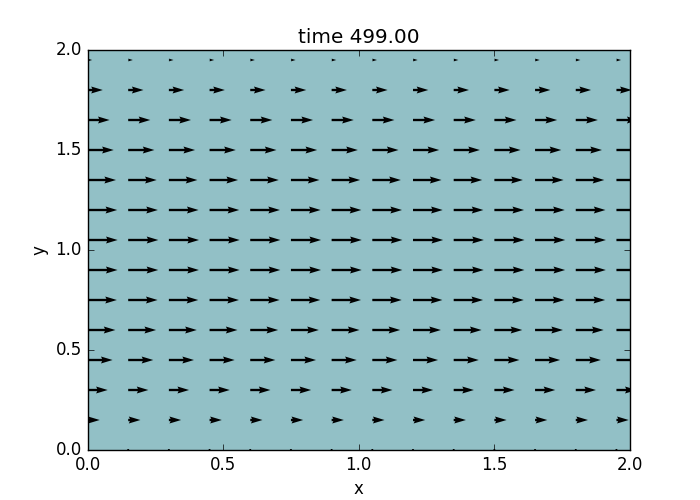

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [16]:
navstokes2D(2, 2, 41, 41, 500)